In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [151]:
df = pd.read_excel(r'C:\Users\mrosk\OneDrive\Desktop\Mental-Health-in-Tech\Preprocessing\encoded_data.xlsx')

In [152]:
df.drop(df.columns[0], inplace = True, axis =1)

In [153]:
df.head()

is_self_employed  num_employees  is_tech_company  \
0                 0              3                1   
1                 0              2                1   
2                 0              2                1   
3                 1              0                2   
4                 0              2                0   

   provides_mental_health_benefits  has_discussed_mental_health  \
0                                2                            1   
1                                1                            3   
2                                1                            1   
3                                3                            2   
4                                4                            1   

   offers_mental_health_resources  is_anonymity_protected  \
0                               1                       0   
1                               3                       3   
2                               1                       0   
3                               2                       2   
4                               1                       1   

   ease_of_leave_for_mental_health  mental_health_discussion_consequences  \
0                                6                                      1   
1                                4                                      1   
2                                1                                      0   
3                                2                                      2   
4                                1                                      3   

   physical_health_discussion_consequences  ...  front_end_developer  hr_rep  \
0                                        1  ...                    0       0   
1                                        1  ...                    1       0   
2                                        1  ...                    0       0   
3                                        2  ...                    0       0   
4                                        0  ...                    1       0   

   one_person_shop  other_job_description  sales_rep  supervisor_team_lead  \
0                0                      0          0                     0   
1                0                      0          0                     0   
2                0                      0          0                     0   
3                0                      0          0                     1   
4                0                      0          0                     1   

   support_rep  gender_Female  gender_Male  gender_Non-Binary/Other  
0            0          False         True                    False  
1            0          False         True                    False  
2            0          False         True                    False  
3            0          False         True                    False  
4            1           True        False                    False  

[5 rows x 94 columns]

In [154]:
#Includes all diagnosis and work position features
df.drop(df.columns[0], inplace = True, axis = 1) 

features_to_drop = [
    'y__dissociative', 'y_eating', 'y_ocd', 'y_psychotic', 'm_adhd', 'm_eating', 
    'm_mood_disorder', 'm_ocd', 'm_personality', 'm_ptsd', 'm_psychotic', 
    'pro_dissociative', 'pro_eating',  'pro_ocd', 'pro_psychotic', 'y_addictive', 
    'y_anxiety_stress', 'y_mood_disorder', 'y_autism_develop', 'y_other', 'y_ptsd', 'y_adhd', 
    'y_personality', 'm_addictive', 'm_anxiety_stress', 'm_autism_develop', 'm_other', 'm_dissociative', 
    'pro_adhd', 'pro_addictive', 'pro_anxiety_stress', 'pro_autism_develop', 'pro_mood_disorder', 
    'pro_ptsd', 'pro_personality', 'pro_other', 'back_end_developer', 'designer', 'dev_evangelist_advocate', 
    'devops_sysadmin', 'executive_leadership', 'front_end_developer', 'hr_rep', 'one_person_shop', 
    'other_job_description', 'sales_rep', 'supervisor_team_lead', 'support_rep', 'y_no_diagnosis', 'pro_no_diagnosis', 'm_no_diagnosis'
]



df = df.drop(columns = features_to_drop)

'''
Already have detailed information about the most prevalent work positions and the current, believed, and professionally diagnosed disorders from your exploratory data analysis (EDA), 
dropping these features could help reduce redundant dimensionality. This can be particularly beneficial for improving model performance and interpretability by removing potential noise.
'''

'\nAlready have detailed information about the most prevalent work positions and the current, believed, and professionally diagnosed disorders from your exploratory data analysis (EDA), \ndropping these features could help reduce redundant dimensionality. This can be particularly beneficial for improving model performance and interpretability by removing potential noise.\n'

In [155]:
#normalize data

from sklearn.preprocessing import StandardScaler, MinMaxScaler

S_scaler = StandardScaler()
Z_standard = S_scaler.fit_transform(df)


MM_scaler = MinMaxScaler()
Z_minmax = MM_scaler.fit_transform(df)

In [156]:
#Feature Selection
from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

In [157]:
#Variance Threshold
selector = VarianceThreshold(threshold=0.1)
data_high_variance_MM = selector.fit_transform(Z_minmax)
print('Number of features after variance thresholding:' , data_high_variance_MM.shape[1])

feature_mask = selector.get_support()
feature_names = df.columns[feature_mask]
print(feature_names)

''' 
Analysis: The variance threshold method is a good initial filter for removing features with very low variance, which are likely uninformative.
Advice: Since it retained 25 features, this method effectively reduced the feature space. Ensure these features are still relevant to your analysis.

Result with Standard Scaler: Using the Standard Scaler, the Variance Threshold method did not remove any features, retaining all original features.
Implication: This suggests that all features have variances above the specified threshold. 
It implies that none of the features are constant or near-constant in the scaled data, 
which can happen if the features have similar scales and ranges after standardization.
'''


Number of features after variance thresholding: 25
Index(['num_employees', 'provides_mental_health_benefits',
       'offers_mental_health_resources', 'is_anonymity_protected',
       'mental_health_discussion_consequences',
       'comfort_discussing_mental_health_with_coworkers',
       'comfort_discussing_mental_health_with_supervisor',
       'employer_values_mental_equal_physical', 'has_previous_employers',
       'previous_employers_mental_health_benefits',
       'aware_of_mental_health_care_options_previous',
       'anonymity_protected_previous_employers',
       'mental_health_discussion_consequences_previous',
       'willing_discuss_physical_health_in_interview',
       'identified_mental_health_impact_career',
       'team_view_negatively_mental_health', 'family_history_mental_illness',
       'had_mental_health_disorder_past',
       'currently_has_mental_health_disorder', 'diagnosed_by_professional',
       'sought_mental_health_treatment', 'interference_with_work_when_t

' \nAnalysis: The variance threshold method is a good initial filter for removing features with very low variance, which are likely uninformative.\nAdvice: Since it retained 25 features, this method effectively reduced the feature space. Ensure these features are still relevant to your analysis.\n\nResult with Standard Scaler: Using the Standard Scaler, the Variance Threshold method did not remove any features, retaining all original features.\nImplication: This suggests that all features have variances above the specified threshold. \nIt implies that none of the features are constant or near-constant in the scaled data, \nwhich can happen if the features have similar scales and ranges after standardization.\n'

In [158]:
#Mutual Information 
kmeans_initial = KMeans(n_clusters=3, random_state=42)
initial_labels = kmeans_initial.fit_predict(df)
initial_labels_S = kmeans_initial.fit_predict(Z_standard)
selector =SelectKBest(mutual_info_classif,k=10)
data_selected_mi_S = selector.fit_transform(df,initial_labels_S)
feature_mask_S = selector.get_support()
feature_names_S = df.columns[feature_mask_S]
print('Top Features (Mutual Information) - Standard Scaler:', data_selected_mi.shape[1])
print(feature_names_S)

'''
Standard Scaler:

Analysis: The selected features focus on previous employers' mental health policies and the individual's mental health history.
Advice: This selection is insightful as it highlights both organizational and personal factors affecting mental health.
'''

kmeans_initial = KMeans(n_clusters=4, random_state=42)
initial_labels_MM = kmeans_initial.fit_predict(Z_minmax)
selector =SelectKBest(mutual_info_classif,k=10)
data_selected_mi_MM = selector.fit_transform(df,initial_labels)
feature_mask_MM = selector.get_support()
feature_names_MM = df.columns[feature_mask]
print('Top Features (Mutual Information) - MinMax Scaler:', data_selected_mi.shape[1])
feature_mask_S = selector.get_support()
feature_names_MM = df.columns[feature_mask_MM]
print(feature_names_MM)

''' 
MinMax Scaler:

Analysis: The selected features include more general mental health-related questions and demographic information (gender).
Advice: Including demographic information can be useful but ensure it doesn’t introduce bias in your analysis.
'''

c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can a

Top Features (Mutual Information) - Standard Scaler: 10
Index(['has_previous_employers', 'previous_employers_discussed_mental_health',
       'previous_employers_offered_mental_health_resources',
       'physical_health_discussion_consequences_previous',
       'willing_discuss_mental_health_previous_coworkers',
       'observed_neg_consequences_previous_workplaces',
       'had_mental_health_disorder_past',
       'currently_has_mental_health_disorder', 'diagnosed_by_professional',
       'sought_mental_health_treatment'],
      dtype='object')


c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Top Features (Mutual Information) - MinMax Scaler: 10
Index(['is_tech_company', 'provides_mental_health_benefits',
       'comfort_discussing_mental_health_with_supervisor',
       'has_previous_employers', 'anonymity_protected_previous_employers',
       'physical_health_discussion_consequences_previous',
       'observed_neg_consequences_previous_workplaces',
       'family_history_mental_illness', 'age', 'gender_Non-Binary/Other'],
      dtype='object')


' \nMinMax Scaler:\n\nAnalysis: The selected features include more general mental health-related questions and demographic information (gender).\nAdvice: Including demographic information can be useful but ensure it doesn’t introduce bias in your analysis.\n'

For Standard Scale:
anonymity_protected_previous_employers
num_employees
team_view_negatively_mental_health
ease_of_leave_for_mental_health
provides_mental_health_benefits
willing_share_mental_health_with_friends_family
age
previous_employers_valued_mental_equal_physical
aware_of_mental_health_care_options_previous
mental_health_discussion_consequences_previous
previous_employers_mental_health_benefits
family_history_mental_illness
willing_discuss_mental_health_previous_supervisor
previous_employers_discussed_mental_health
interference_with_work_when_not_treated
physical_health_discussion_consequences_previous
previous_employers_offered_mental_health_resources
willing_discuss_mental_health_previous_coworkers
has_previous_employers
observed_neg_consequences_previous_workplaces
interference_with_work_when_treated
currently_has_mental_health_disorder
sought_mental_health_treatment
diagnosed_by_professional
had_mental_health_disorder_past


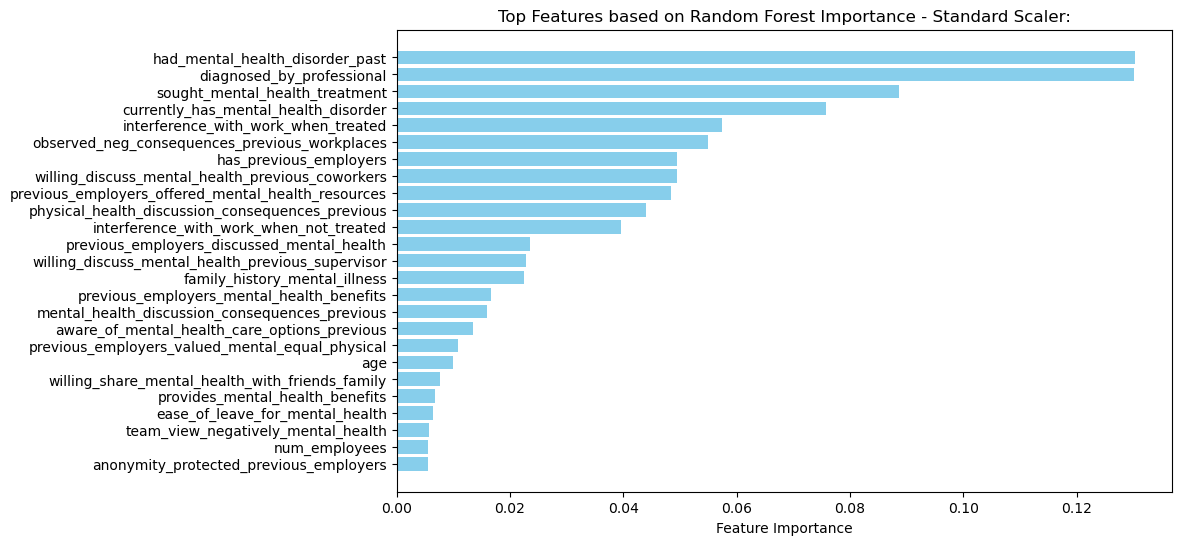



For MinMax Scale:
employer_values_mental_equal_physical
comfort_discussing_mental_health_with_supervisor
family_history_mental_illness
provides_mental_health_benefits
mental_health_discussion_consequences_previous
aware_of_mental_health_care_options_previous
previous_employers_mental_health_benefits
is_anonymity_protected
mental_health_discussion_consequences
age
has_discussed_mental_health
offers_mental_health_resources
currently_has_mental_health_disorder
comfort_discussing_mental_health_with_coworkers
interference_with_work_when_not_treated
observed_neg_consequences_for_coworkers
interference_with_work_when_treated
physical_health_discussion_consequences
is_tech_company
num_employees
had_mental_health_disorder_past
diagnosed_by_professional
sought_mental_health_treatment
gender_Female
gender_Male


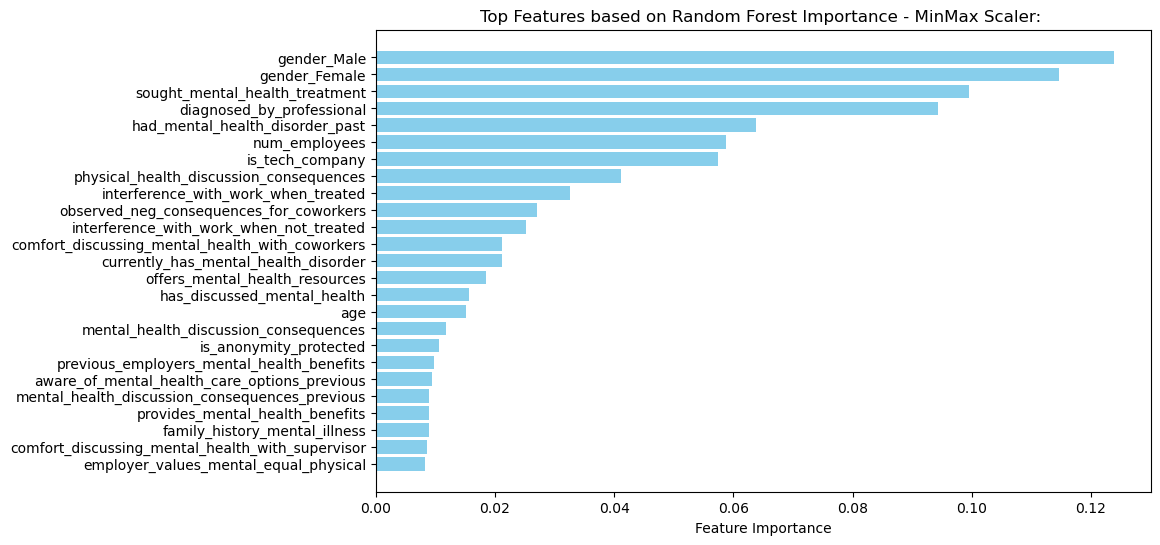

' \nMinMax Scaler:\n\nAnalysis: This includes demographic information and organizational factors.\nAdvice: Similar to the Mutual Information advice, ensure demographic factors are used appropriately to avoid biased outcomes.\n'

In [159]:
#Feature Importance from Random Forest 
clf = RandomForestClassifier(random_state=42)
clf.fit(df,initial_labels_S)
importances = clf.feature_importances_
indices = np.argsort(importances)[-25:]
data_selected_rf = df.iloc[:, indices]
feature_names_rf = df.columns[indices]

print('For Standard Scale:')
for feature in feature_names_rf:
    print(feature)

#Visualization of feature importance based on Random Forest
plt.figure(figsize=(10,6))
plt.barh(df.columns[indices], importances[indices], color ='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top Features based on Random Forest Importance - Standard Scaler:')
plt.show()

''' 
Standard Scaler:

Analysis: The selected features emphasize personal mental health history and experiences with previous employers.
Advice: This aligns well with the goal of identifying key factors related to mental health in the tech industry. Consider the top features for deeper analysis.
'''
print('\n')

print('For MinMax Scale:')
#Feature Importance from Random Forest 
clf = RandomForestClassifier(random_state=42)
clf.fit(df,initial_labels_MM)
importances = clf.feature_importances_
indices = np.argsort(importances)[-25:]
data_selected_rf = df.iloc[:, indices]
feature_names_rf = df.columns[indices]

for feature in feature_names_rf:
    print(feature)

#Visualization of feature importance based on Random Forest
plt.figure(figsize=(10,6))
plt.barh(df.columns[indices], importances[indices], color ='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top Features based on Random Forest Importance - MinMax Scaler: ')
plt.show()

''' 
MinMax Scaler:

Analysis: This includes demographic information and organizational factors.
Advice: Similar to the Mutual Information advice, ensure demographic factors are used appropriately to avoid biased outcomes.
'''


In [256]:
#The features that are selected below are a combination of all feature selection techniques will apply Dimensionality reduction to them and reiterate.

top_features = [
    'had_mental_health_disorder_past', 'diagnosed_by_professional', 
    'sought_mental_health_treatment', 'currently_has_mental_health_disorder', 
    'interference_with_work_when_treated', 'observed_neg_consequences_previous_workplaces', 
    'has_previous_employers', 'willing_discuss_mental_health_previous_coworkers', 
    'previous_employers_offered_mental_health_resources', 'previous_employers_discussed_mental_health', 
    'gender_Male', 'gender_Female', 'num_employees', 'is_tech_company', 
    'physical_health_discussion_consequences', 'interference_with_work_when_not_treated', 
    'observed_neg_consequences_for_coworkers', 'comfort_discussing_mental_health_with_coworkers', 
    'offers_mental_health_resources', 'age', 'provides_mental_health_benefits', 
    'is_anonymity_protected', 'mental_health_discussion_consequences', 
    'comfort_discussing_mental_health_with_supervisor', 'employer_values_mental_equal_physical', 
    'previous_employers_mental_health_benefits', 'aware_of_mental_health_care_options_previous', 
    'anonymity_protected_previous_employers', 'mental_health_discussion_consequences_previous', 
    'willing_discuss_physical_health_in_interview', 'identified_mental_health_impact_career', 
    'team_view_negatively_mental_health', 'family_history_mental_illness', 
    'works_remotely', 'willing_discuss_mental_health_previous_supervisor'
]

#from MinMax Scaler RF Importance
top_features = [
    'employer_values_mental_equal_physical', 'comfort_discussing_mental_health_with_supervisor',
    'family_history_mental_illness', 'provides_mental_health_benefits',
    'mental_health_discussion_consequences_previous', 'aware_of_mental_health_care_options_previous',
    'previous_employers_mental_health_benefits', 'is_anonymity_protected',
    'mental_health_discussion_consequences', 'age',
    'has_discussed_mental_health', 'offers_mental_health_resources',
    'currently_has_mental_health_disorder', 'comfort_discussing_mental_health_with_coworkers',
    'interference_with_work_when_not_treated', 'observed_neg_consequences_for_coworkers',
    'interference_with_work_when_treated', 'physical_health_discussion_consequences',
    'is_tech_company', 'num_employees',
    'had_mental_health_disorder_past', 'diagnosed_by_professional',
    'sought_mental_health_treatment', 'gender_Female',
    'gender_Male'
]

#from Standard Scaler RF Importance
top_features = [
    'employer_values_mental_equal_physical', 'comfort_discussing_mental_health_with_supervisor',
    'family_history_mental_illness', 'provides_mental_health_benefits',
    'mental_health_discussion_consequences_previous', 'aware_of_mental_health_care_options_previous',
    'previous_employers_mental_health_benefits', 'is_anonymity_protected',
    'mental_health_discussion_consequences', 'age',
    'has_discussed_mental_health', 'offers_mental_health_resources',
    'currently_has_mental_health_disorder', 'comfort_discussing_mental_health_with_coworkers',
    'interference_with_work_when_not_treated', 'observed_neg_consequences_for_coworkers',
    'interference_with_work_when_treated', 'physical_health_discussion_consequences',
    'is_tech_company', 'num_employees',
    'had_mental_health_disorder_past', 'diagnosed_by_professional',
    'sought_mental_health_treatment', 'gender_Female',
    'gender_Male'
]

data_selected = df[top_features]

scaler_S = StandardScaler()
data_selected_S = scaler_S.fit_transform(data_selected)
data_standard_df = pd.DataFrame(data_selected_S, columns=top_features)

scaler_MM = MinMaxScaler()
data_selected_MM = scaler_MM.fit_transform(data_selected)
data_minmax_df = pd.DataFrame(data_selected_MM, columns=top_features)


#Apply Dimensionality Reduction Methods:
from sklearn.decomposition import PCA, FastICA
from prince import MCA
from sklearn.manifold import MDS, LocallyLinearEmbedding, Isomap, TSNE
import umap

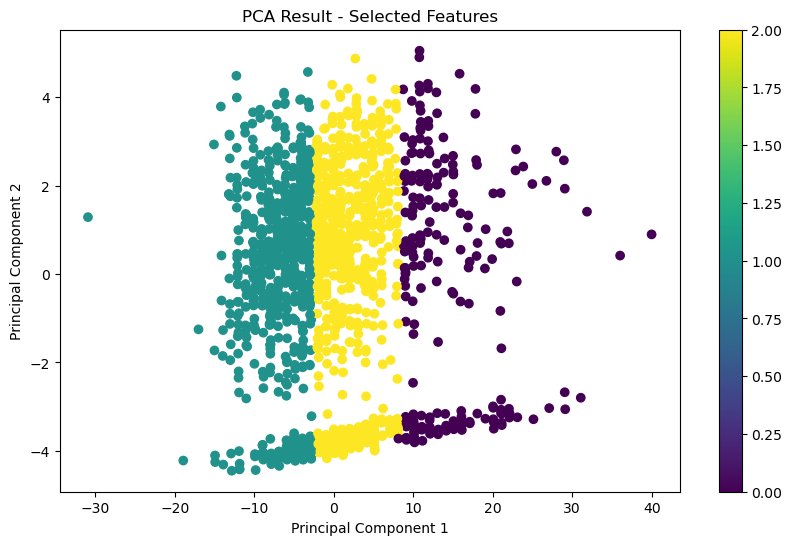

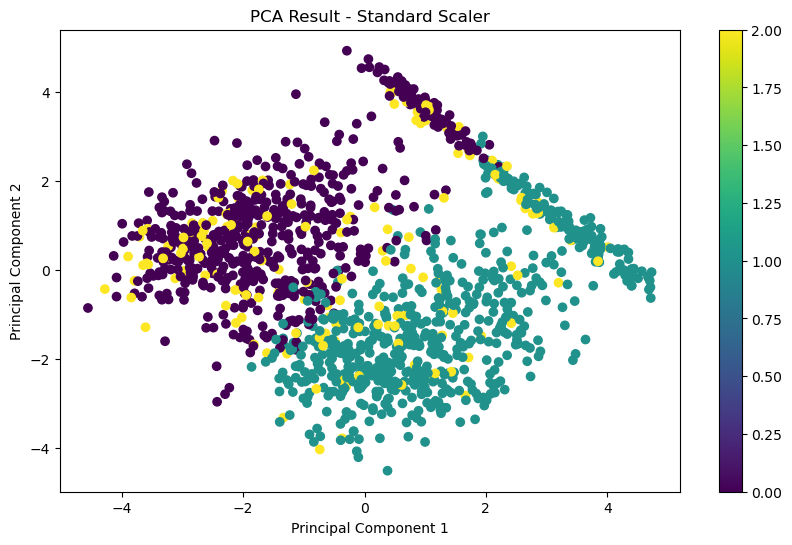

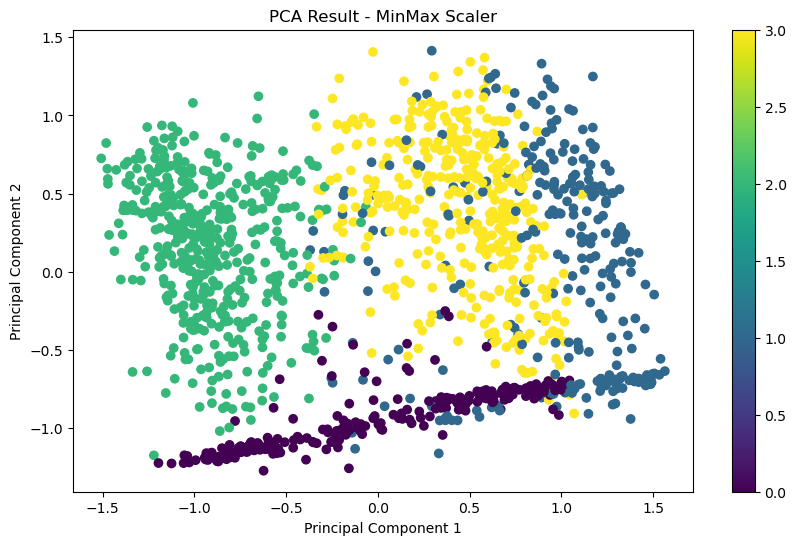

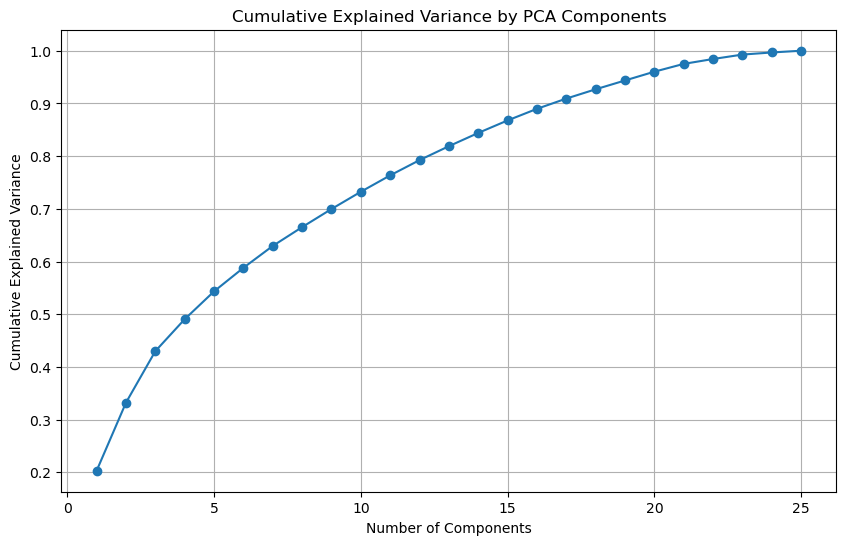

In [257]:
#PCA 
pca = PCA(n_components=len(top_features))
pca_result= pca.fit_transform(data_selected)
pca_result_S = pca.fit_transform(data_selected_S)
pca_result_MM = pca.fit_transform(data_selected_MM)
explained_variance_pca = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=initial_labels, cmap='viridis')
plt.title('PCA Result - Selected Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(pca_result_S[:, 0], pca_result_S[:, 1], c=initial_labels_S, cmap='viridis')
plt.title('PCA Result - Standard Scaler')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(pca_result_MM[:, 0], pca_result_MM[:, 1], c=initial_labels_MM, cmap='viridis')
plt.title('PCA Result - MinMax Scaler')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(1,len(explained_variance_pca) + 1), explained_variance_pca, marker = 'o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()





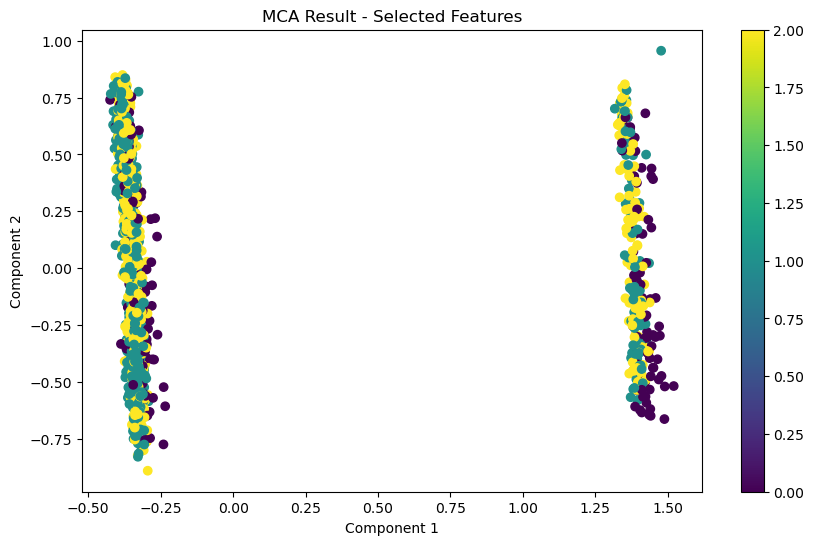

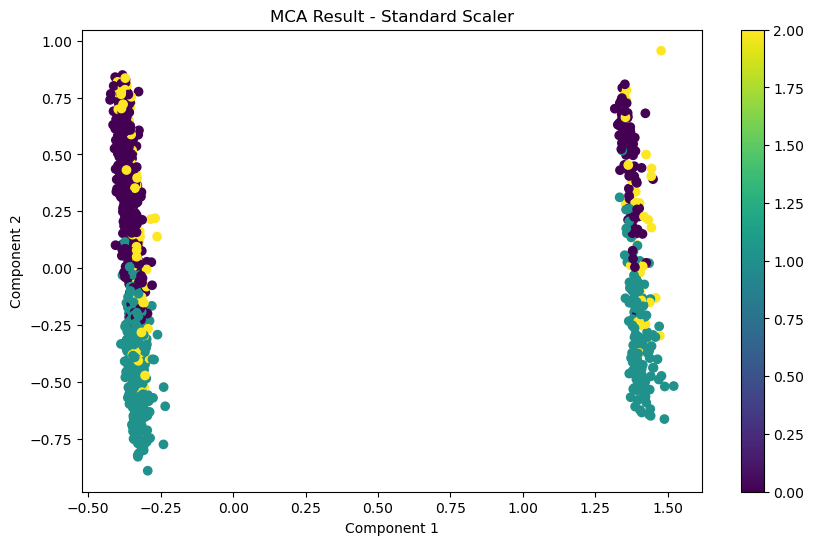

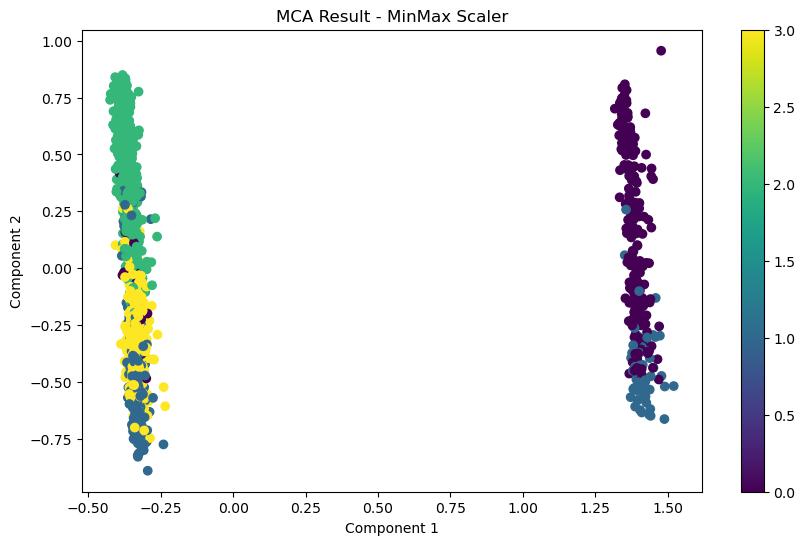

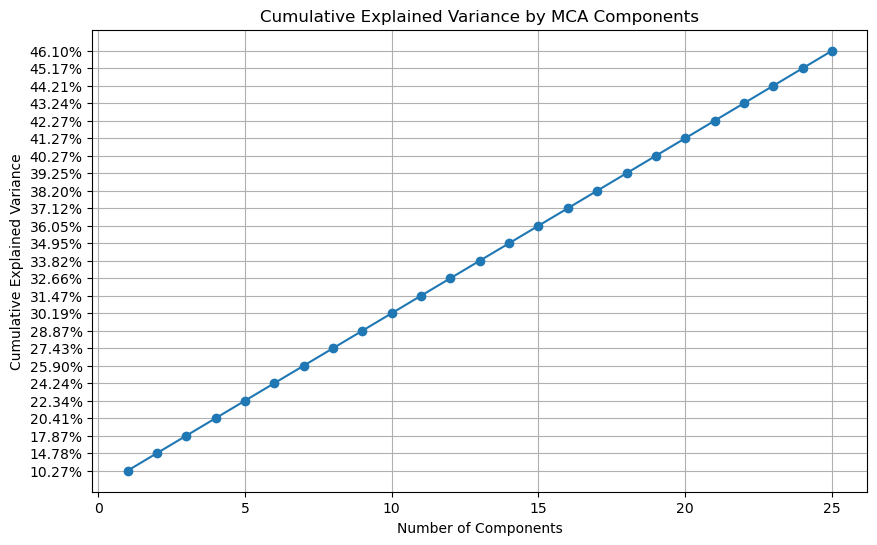

In [258]:
#MCA 
mca = MCA(n_components = len(top_features))
mca_result = mca.fit_transform(data_selected)
mca_result_S = mca.fit_transform(data_standard_df)
mca_result_MM = mca.fit_transform(data_minmax_df)
explained_variance_mca =mca.eigenvalues_summary.iloc[:, 2].values

plt.figure(figsize=(10, 6))
plt.scatter(mca_result[0], mca_result[1], c=initial_labels, cmap='viridis')
plt.title('MCA Result - Selected Features')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(mca_result_S[0], mca_result_S[1], c=initial_labels_S, cmap='viridis')
plt.title('MCA Result - Standard Scaler')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(mca_result_MM[0], mca_result_MM[1], c=initial_labels_MM, cmap='viridis')
plt.title('MCA Result - MinMax Scaler')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()
plt.show()

# Visualize MCA explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_mca) + 1), explained_variance_mca, marker='o')
plt.title('Cumulative Explained Variance by MCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [259]:
#MDS
mds = MDS (n_components=2, random_state=42, normalized_stress = 'auto')
mds_result = mds.fit_transform(data_selected)
mds_result_S = mds.fit_transform(data_selected_S)
mds_result_MM = mds.fit_transform(data_selected_MM)

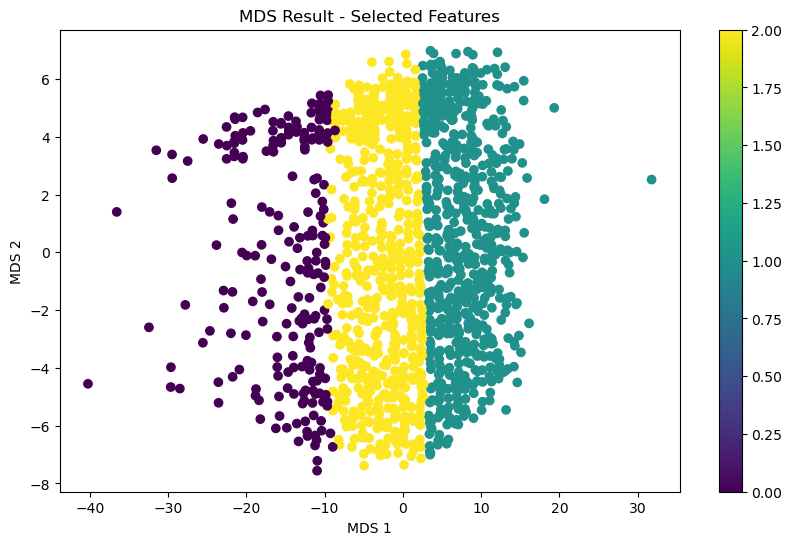

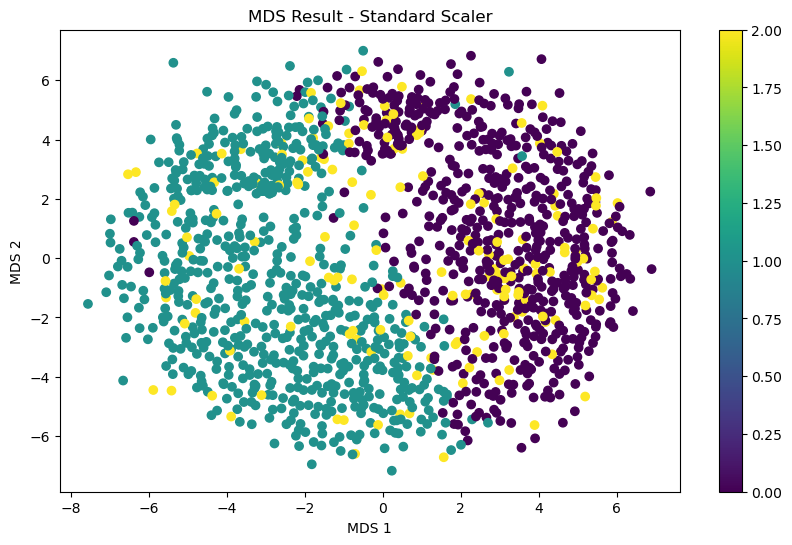

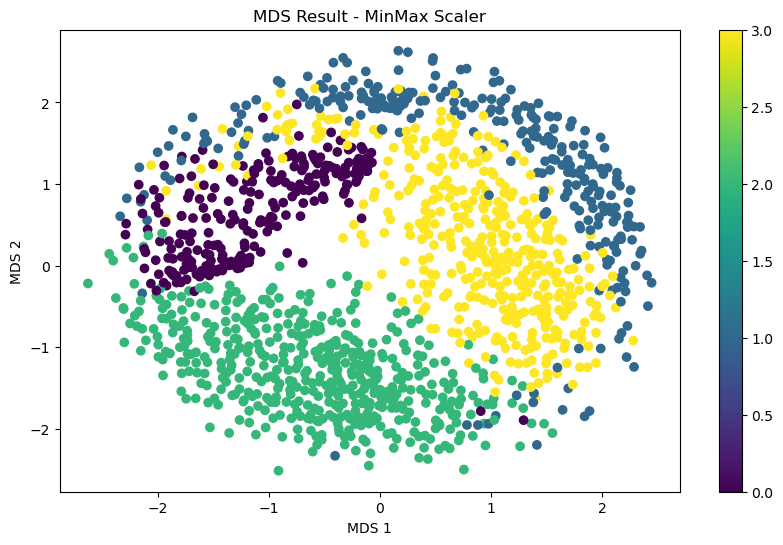

In [260]:
plt.figure(figsize=(10, 6))
plt.scatter(mds_result[:, 0], mds_result[:, 1],c=initial_labels, cmap='viridis')
plt.title('MDS Result - Selected Features')
plt.xlabel('MDS 1')
plt.ylabel('MDS 2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(mds_result_S[:, 0], mds_result_S[:, 1], c=initial_labels_S, cmap='viridis')
plt.title('MDS Result - Standard Scaler')
plt.xlabel('MDS 1')
plt.ylabel('MDS 2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(mds_result_MM[:, 0], mds_result_MM[:, 1], c=initial_labels_MM, cmap='viridis')
plt.title('MDS Result - MinMax Scaler')
plt.xlabel('MDS 1')
plt.ylabel('MDS 2')
plt.colorbar()
plt.show()

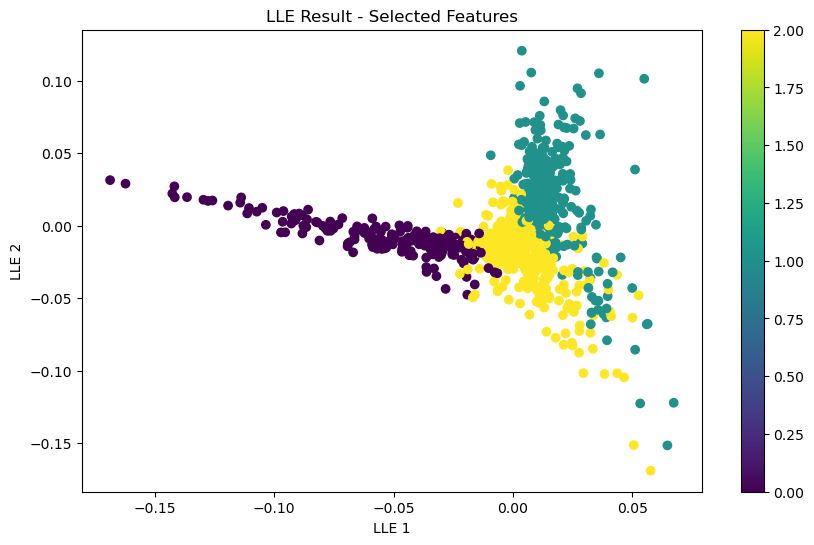

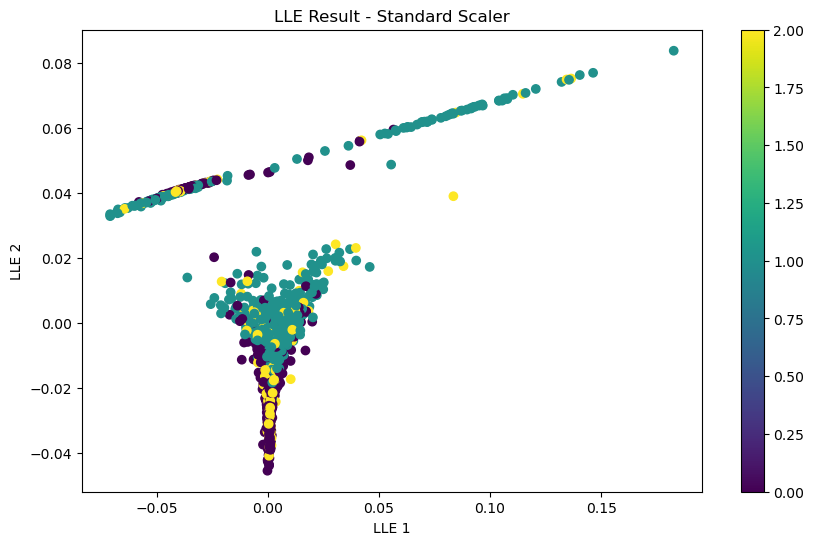

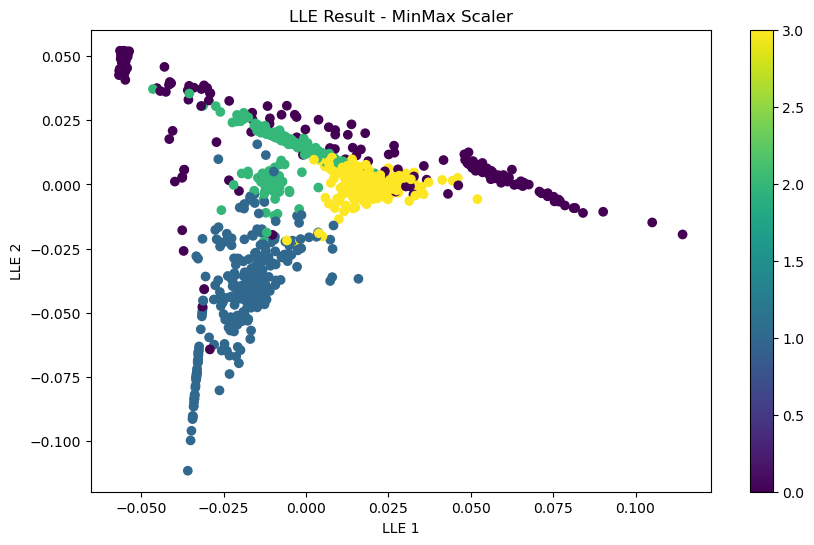

In [261]:
#lle
lle = LocallyLinearEmbedding(n_components=2,n_neighbors=10, random_state=42)
lle_result = lle.fit_transform(data_selected)
lle_result_S = lle.fit_transform(data_selected_S)
lle_result_MM = lle.fit_transform(data_selected_MM)

plt.figure(figsize=(10, 6))
plt.scatter(lle_result[:, 0], lle_result[:, 1], c=initial_labels, cmap='viridis')
plt.title('LLE Result - Selected Features')
plt.xlabel('LLE 1')
plt.ylabel('LLE 2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(lle_result_S[:, 0], lle_result_S[:, 1], c=initial_labels_S, cmap='viridis')
plt.title('LLE Result - Standard Scaler')
plt.xlabel('LLE 1')
plt.ylabel('LLE 2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(lle_result_MM[:, 0], lle_result_MM[:, 1], c=initial_labels_MM, cmap='viridis')
plt.title('LLE Result - MinMax Scaler')
plt.xlabel('LLE 1')
plt.ylabel('LLE 2')
plt.colorbar()
plt.show()


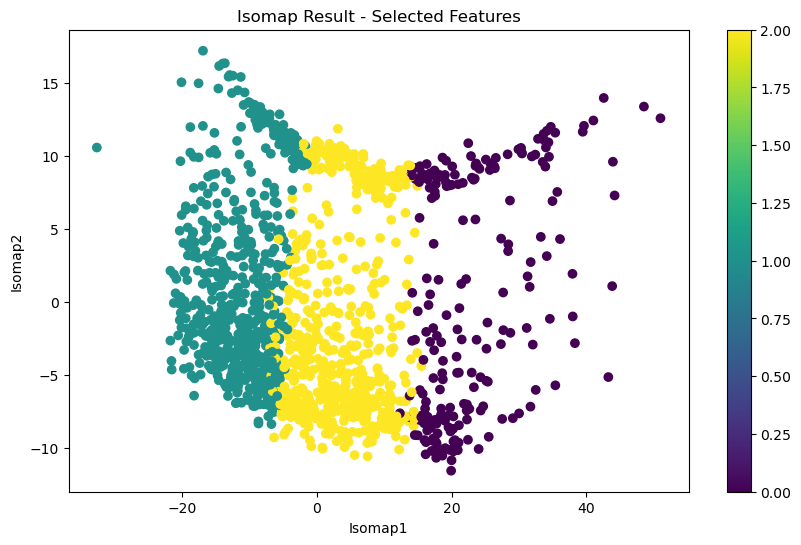

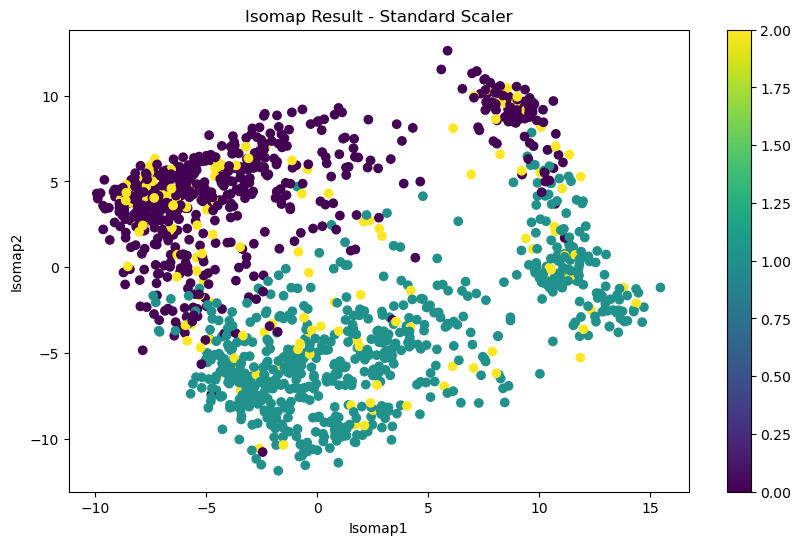

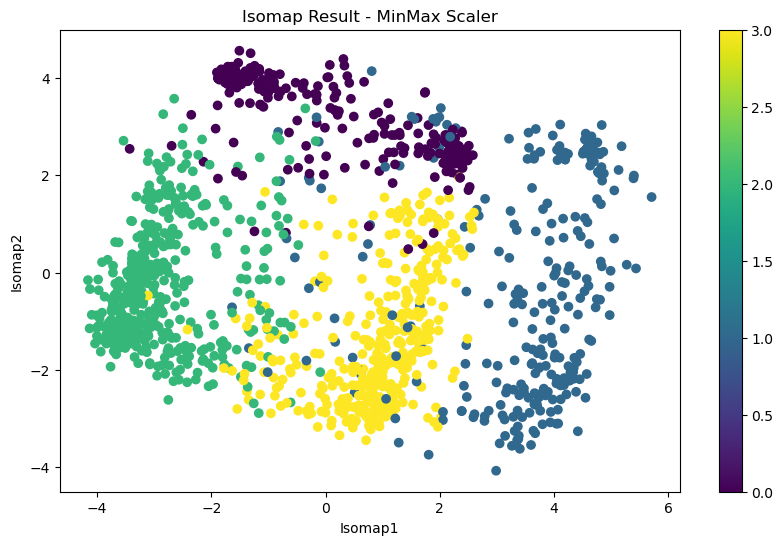

In [262]:
#Isomap

isomap = Isomap(n_components=2,n_neighbors=10)
isomap_result = isomap.fit_transform(data_selected)
isomap_result_S = isomap.fit_transform(data_selected_S)
isomap_result_MM = isomap.fit_transform(data_selected_MM)

plt.figure(figsize=(10, 6))
plt.scatter(isomap_result[:, 0], isomap_result[:, 1], c=initial_labels, cmap='viridis')
plt.title('Isomap Result - Selected Features')
plt.xlabel('Isomap1')
plt.ylabel('Isomap2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(isomap_result_S[:, 0], isomap_result_S[:, 1], c=initial_labels_S, cmap='viridis')
plt.title('Isomap Result - Standard Scaler')
plt.xlabel('Isomap1')
plt.ylabel('Isomap2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(isomap_result_MM[:, 0], isomap_result_MM[:, 1], c=initial_labels_MM, cmap='viridis')
plt.title('Isomap Result - MinMax Scaler')
plt.xlabel('Isomap1')
plt.ylabel('Isomap2')
plt.colorbar()
plt.show()


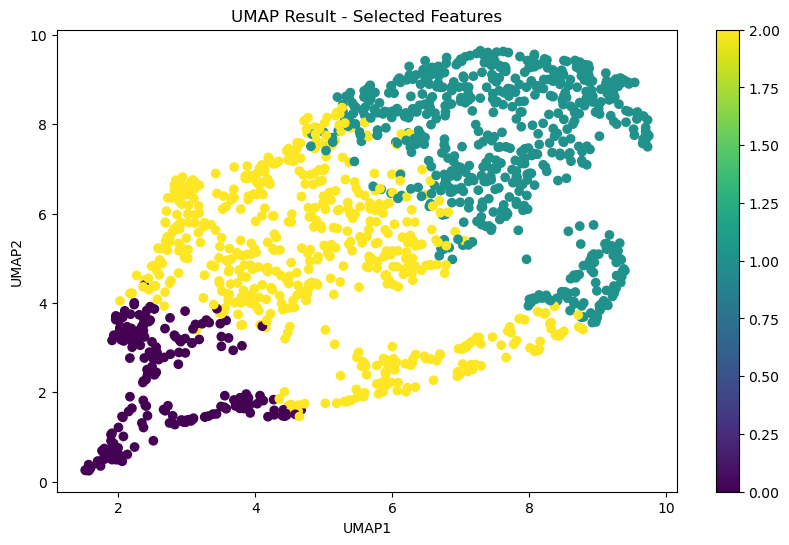

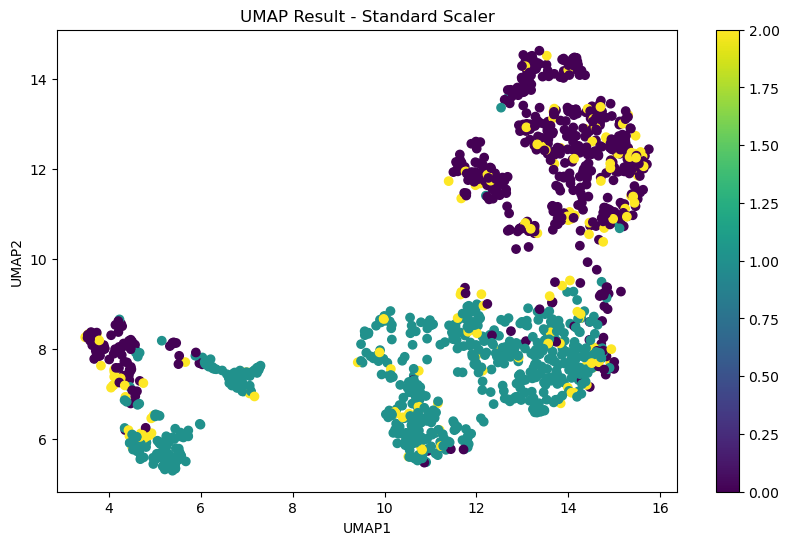

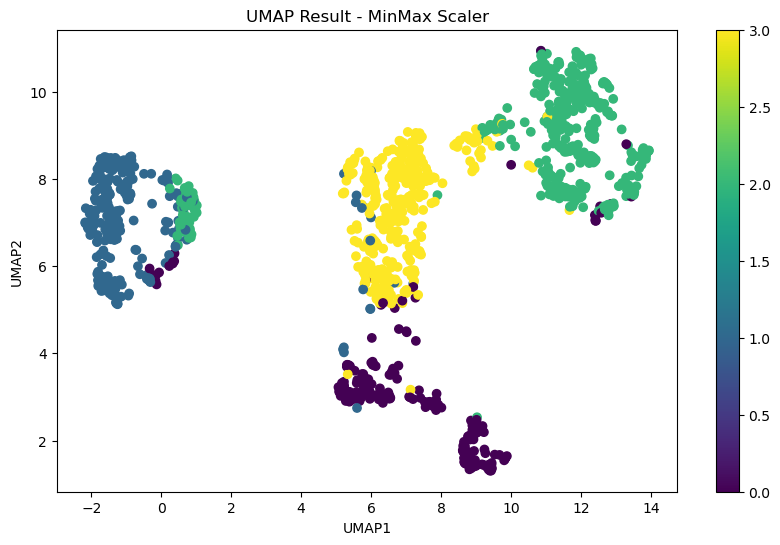

In [263]:
#UMAP
umap_model = umap.UMAP(n_components=2)
umap_result = umap_model.fit_transform(data_selected)
umap_result_S = umap_model.fit_transform(data_selected_S)
umap_result_MM = umap_model.fit_transform(data_selected_MM)

plt.figure(figsize=(10, 6))
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=initial_labels, cmap='viridis')
plt.title('UMAP Result - Selected Features')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.colorbar()
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(umap_result_S[:, 0], umap_result_S[:, 1], c=initial_labels_S, cmap='viridis')
plt.title('UMAP Result - Standard Scaler')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(umap_result_MM[:, 0], umap_result_MM[:, 1], c=initial_labels_MM, cmap='viridis')
plt.title('UMAP Result - MinMax Scaler')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.colorbar()
plt.show()



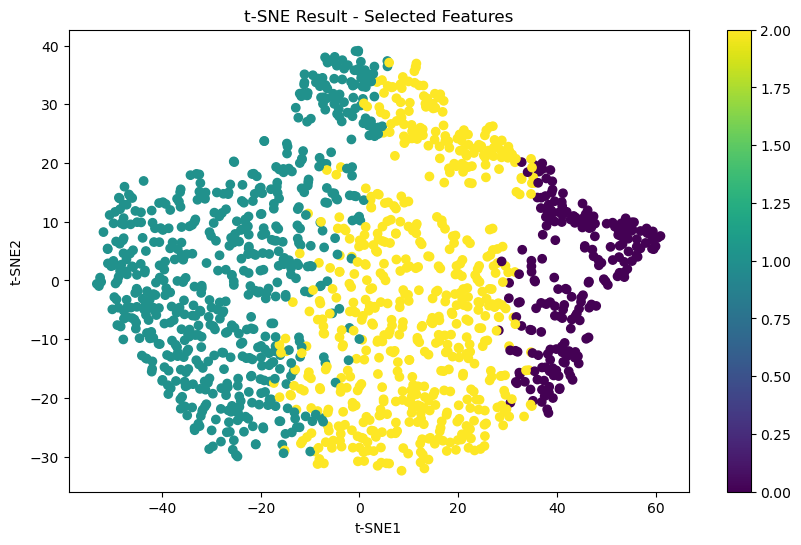

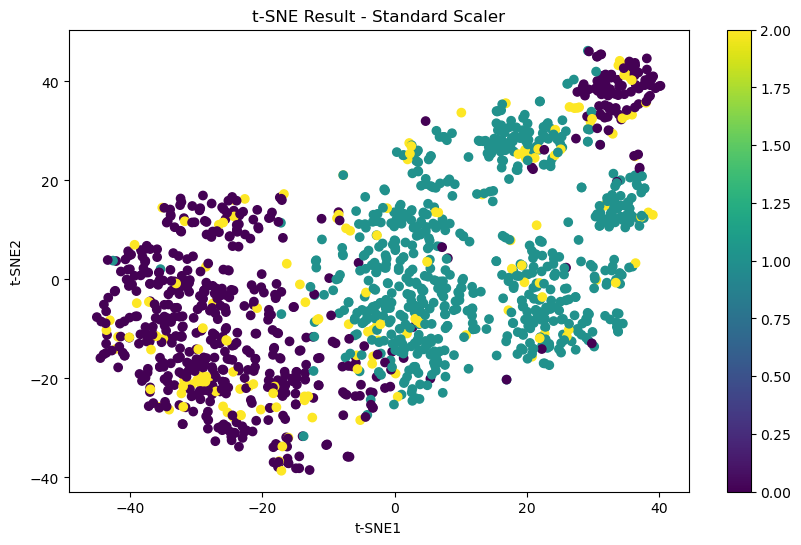

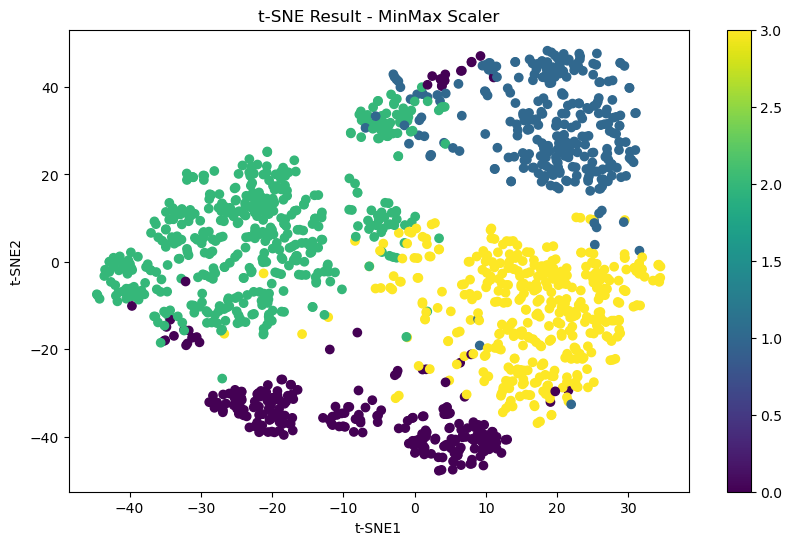

In [264]:
#t-SNE
tsne = TSNE(n_components=2,random_state=42)
tsne_result = tsne.fit_transform(data_selected)
tsne_result_S = tsne.fit_transform(data_selected_S)
tsne_result_MM = tsne.fit_transform(data_selected_MM)

plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=initial_labels, cmap='viridis')
plt.title('t-SNE Result - Selected Features')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(tsne_result_S[:, 0], tsne_result_S[:, 1], c=initial_labels_S, cmap='viridis')
plt.title('t-SNE Result - Standard Scaler')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(tsne_result_MM[:, 0], tsne_result_MM[:, 1], c=initial_labels_MM, cmap='viridis')
plt.title('t-SNE Result - MinMax Scaler')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.colorbar()
plt.show()


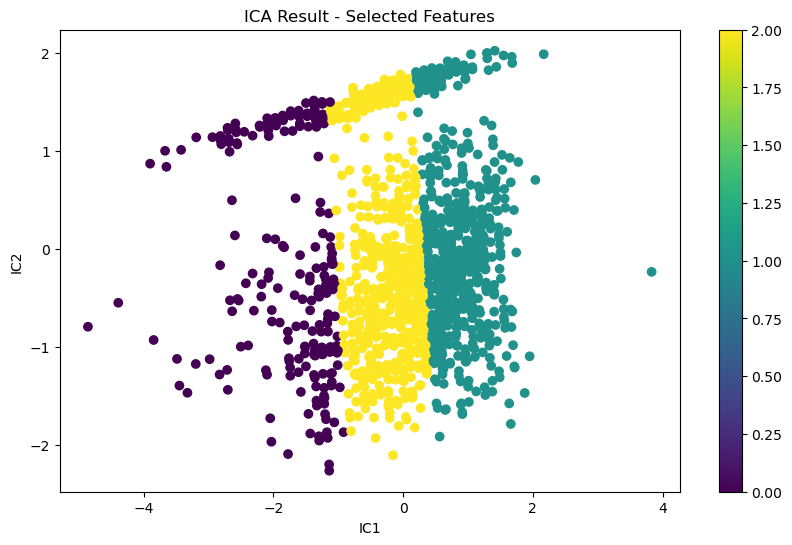

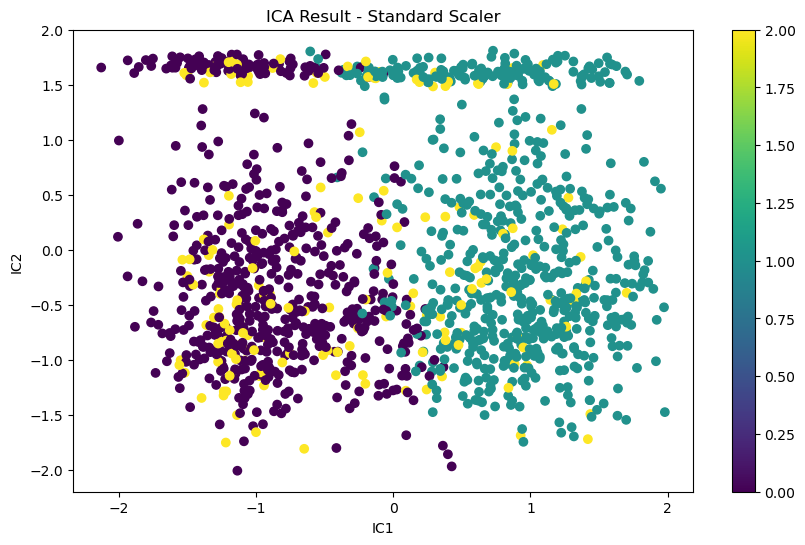

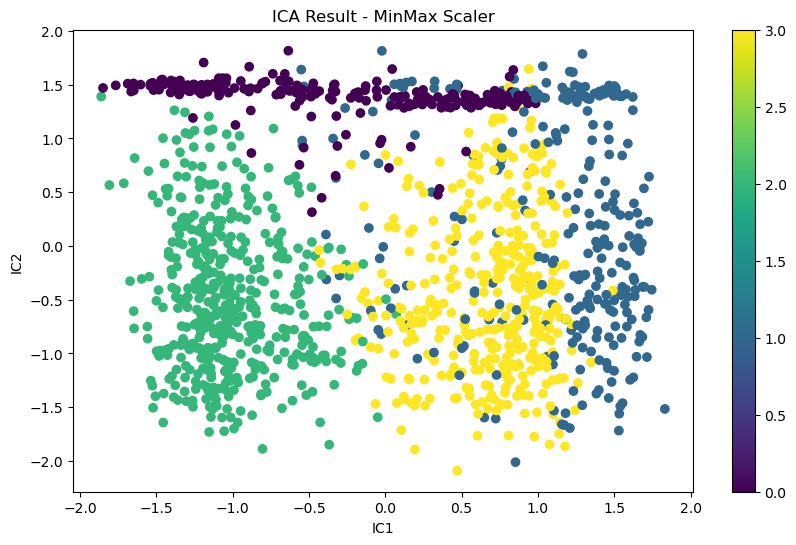

In [265]:
#ICA
ica= FastICA(n_components=2, random_state=42, whiten='unit-variance')
ica_result = ica.fit_transform(data_selected)
ica_result_S = ica.fit_transform(data_selected_S)
ica_result_MM = ica.fit_transform(data_selected_MM)

plt.figure(figsize=(10, 6))
plt.scatter(ica_result[:, 0], ica_result[:, 1], c=initial_labels, cmap='viridis')
plt.title('ICA Result - Selected Features')
plt.xlabel('IC1')
plt.ylabel('IC2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(ica_result_S[:, 0], ica_result_S[:, 1], c=initial_labels_S, cmap='viridis')
plt.title('ICA Result - Standard Scaler')
plt.xlabel('IC1')
plt.ylabel('IC2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(ica_result_MM[:, 0], ica_result_MM[:, 1], c=initial_labels_MM, cmap='viridis')
plt.title('ICA Result - MinMax Scaler')
plt.xlabel('IC1')
plt.ylabel('IC2')
plt.colorbar()
plt.show()



